In [86]:
import sys
sys.path.append("../")
from src.func import *
from tensorflow.keras.models import load_model

from PIL import Image, ImageDraw, ImageFont
import random

In [864]:
number = random.randint(1, 9)

In [865]:
i = random.randint(0, 1)
fonts = ["Lato-Medium.ttf", "Helvetica-Bold-Font.ttf", "Antonio-Regular.ttf", "times-new-roman.ttf", "calibri.ttf"]
font = fonts[i]

In [866]:
color = random.randint(200, 255)

In [867]:
size = random.randint(15, 25)
x = random.randint(0, 14)
y = random.randint(0, 8)

In [868]:
number, color, size, x, y

(6, 217, 20, 7, 2)

In [869]:
img = Image.new("L", (28, 28))
draw = ImageDraw.Draw(img)

In [870]:
font = ImageFont.truetype("Helvetica-Bold-Font.ttf", size)
draw.text((x, y), str(number), color, font=font)

In [915]:
img

In [916]:
img_arr = np.array(img)

In [873]:
imagen = img_arr.tolist()

In [924]:
img_arr.shape

(28, 28)

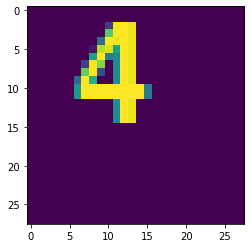

In [925]:
plt.imshow(img_arr)

In [895]:
num_pics = []
value_pics = []

In [896]:
for _ in range(40000):
    number = random.randint(1, 9)
    i = random.randint(0, 1)
    fonts = ["Lato-Medium.ttf", "Helvetica-Bold-Font.ttf", "Antonio-Regular.ttf", "times-new-roman.ttf", "calibri.ttf"]
    font = fonts[i]
    color = random.randint(200, 255)
    size = random.randint(15, 25)
    x = random.randint(0, 14)
    y = random.randint(0, 8)
    img = Image.new("L", (28, 28))
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(font, size)
    draw.text((x, y), str(number), color, font=font)
    img_arr = np.array(img)
    imagen = img_arr.tolist()
    num_pics.append(imagen)
    value_pics.append(number)

In [830]:
num_pics

[[[0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,

In [897]:
len(num_pics)

40000

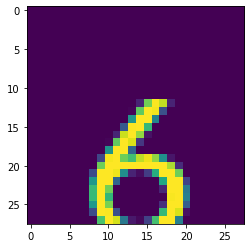

In [884]:
plt.imshow(num_pics[33])

In [898]:
len(value_pics)

40000

In [899]:
arraynums = np.array(num_pics)

In [901]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
train_labels_hot = to_categorical(value_pics)
num_pics = arraynums.reshape((40000, 28, 28, 1))
num_pics = num_pics.astype('float32') / 255


In [902]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [903]:
model.fit(num_pics, train_labels_hot, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
282/282 [==============================] - 10s 36ms/step - loss: 0.9223 - accuracy: 0.6833 - val_loss: 0.4918 - val_accuracy: 0.8367
Epoch 2/10
282/282 [==============================] - 10s 36ms/step - loss: 0.1317 - accuracy: 0.9634 - val_loss: 0.1791 - val_accuracy: 0.9270
Epoch 3/10
282/282 [==============================] - 11s 37ms/step - loss: 0.0559 - accuracy: 0.9858 - val_loss: 0.0133 - val_accuracy: 0.9967
Epoch 4/10
282/282 [==============================] - 11s 40ms/step - loss: 0.0297 - accuracy: 0.9932 - val_loss: 0.0186 - val_accuracy: 0.9955
Epoch 5/10
282/282 [==============================] - 11s 40ms/step - loss: 0.0226 - accuracy: 0.9945 - val_loss: 0.0022 - val_accuracy: 0.9998
Epoch 6/10
282/282 [==============================] - 12s 41ms/step - loss: 0.0157 - accuracy: 0.9961 - val_loss: 6.5791e-04 - val_accuracy: 1.0000
Epoch 7/10
282/282 [==============================] - 12s 42ms/step - loss: 0.0165 - accuracy: 0.9959 - val_loss: 9.7507e-04 - val_a

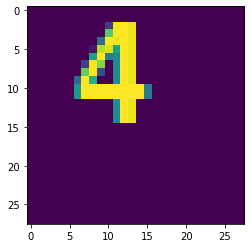

In [927]:
plt.imshow(img_arr)

In [918]:
numerinchi = img_arr.reshape((1, 28, 28, 1))
numerinchi = numerinchi.astype('float32') / 255

In [921]:
res = np.argmax(model.predict(numerinchi), axis=-1)

In [928]:
print(f"The number is {res[0]}")

The number is 4


In [926]:
from keras.models import load_model
model.save('my_model_my_numbers.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model
# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')